In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

In [29]:
df = pd.read_excel('Seasonality.xlsx')
df.drop(df.index[0], axis=0, inplace=True)
df.reset_index(inplace=True, drop=True)

In [245]:
alpha = 0.3

In [31]:
df

,Date,Quarter,Original,Trend-Cycle,Ratio,Seasonal,Seasonally
0,1983-12-01,4.0,147.6,NaN,NaN,0.686136,215.118
1,1984-03-01,1.0,251.8,NaN,NaN,1.02386,245.931
2,1984-06-01,2.0,273.1,229.363,1.19069,1.1605,235.329
3,1984-09-01,3.0,249.1,224.5,1.10958,1.1295,220.541
4,1984-12-01,4.0,139.3,219.062,0.635892,0.686136,203.021
5,1985-03-01,1.0,221.2,218.75,1.0112,1.02386,216.045
6,1985-06-01,2.0,260.2,220.2,1.18165,1.1605,224.213
7,1985-09-01,3.0,259.5,223.387,1.16166,1.1295,229.748
8,1985-12-01,4.0,140.5,231.25,0.607568,0.686136,204.77
9,1986-03-01,1.0,245.5,239.512,1.025,1.02386,239.778


In [48]:
def algebraic_tranformation(df, columnNameActual, columnNamePredicted, columnNameErrors, alpha):
    df_new = df 
    
    for i in range(0, len(df_new)):
        if i < 2:
            # sets the first two values in Forecast to be the first value in Seasonally
            df_new.loc[i, columnNamePredicted] = df_new.loc[0, columnNameActual]
        else:
            df_new.loc[i, columnNamePredicted] = 2 * df_new.loc[i-1, columnNameActual] - df_new.loc[i-2, columnNameActual] - 2 * (1-alpha) * df_new.loc[i-1, columnNameErrors] + ((1-alpha)**2 * df_new.loc[i-2, columnNameErrors])
            print(df_new.loc[i, columnNamePredicted])
        # calculates the error, y_actual - y_predicted
        df_new.loc[i, columnNameErrors] = df_new.loc[i, columnNameActual] - df_new.loc[i, columnNamePredicted]
        
    return df_new

In [49]:
df_new = algebraic_tranformation(df, 'Seasonally', 'Forecast', 'Error', alpha)

244.15370736880098
242.67815555317142
226.69891056927023
204.35397838905075
210.08091590457747
220.70360685027032
229.66945732061652
208.6572559553177
234.9062918394321
260.00430557455894
263.2779171202679
254.54130240891362
315.28660265823845
354.84138088259044
380.18575851246464
401.7013867261795
415.0581981726304
421.71606388276274
441.78716146563204
406.52270729575355
399.3754693002154
359.44620102714686
335.13941590207133
327.42214876232794
292.8575582604966
252.93043843511975
237.2075976840056
274.9717412010964
224.9037974363819
227.80672921620442
216.727734530237
265.8683529191019
260.462049435374
253.1139319011939
276.2795295463886
265.28277823570824
268.7695055121304
256.82101114442224


In [35]:
df_new

,Date,Quarter,Original,Trend-Cycle,Ratio,Seasonal,Seasonally,Forecast,Error
0,1983-12-01,4.0,147.6,NaN,NaN,0.686136,215.118,215.117734,0.000000
1,1984-03-01,1.0,251.8,NaN,NaN,1.02386,245.931,215.117734,30.813656
2,1984-06-01,2.0,273.1,229.363,1.19069,1.1605,235.329,244.153693,-8.824869
3,1984-09-01,3.0,249.1,224.5,1.10958,1.1295,220.541,242.678152,-22.137599
4,1984-12-01,4.0,139.3,219.062,0.635892,0.686136,203.021,226.698919,-23.677914
5,1985-03-01,1.0,221.2,218.75,1.0112,1.02386,216.045,204.353994,11.690579
6,1985-06-01,2.0,260.2,220.2,1.18165,1.1605,224.213,210.080919,14.132043
7,1985-09-01,3.0,259.5,223.387,1.16166,1.1295,229.748,220.703602,9.044586
8,1985-12-01,4.0,140.5,231.25,0.607568,0.686136,204.77,229.669450,-24.899521
9,1986-03-01,1.0,245.5,239.512,1.025,1.02386,239.778,208.657264,31.120958


In [60]:
n1=df.Seasonally.values
n2=df.Forecast.values
n3=df.Error.values

In [69]:
def RMSE (n3):
    rms = np.sqrt(np.mean(np.square(n3)))
    return rms

In [80]:
len(n3)

40

In [68]:
df_error = sum

np.sqrt(np.var(df.Error) + np.average(df.Error)**2)

In [17]:
sum(df.Seasonally) - sum(df.Forecast)

11.563860827409371

In [18]:
sum(df.Error)

11.563860827413635

In [230]:
result= minimize(RMSE, n3, bounds=[(0,1)])

In [232]:
result

      fun: 1.000936566229035e-07
 hess_inv: array([[ 9.99999998e-01, -5.72436406e-06,  7.12988079e-06, ...,
        -7.91113195e-06, -6.95312439e-06, -3.88265435e-06],
       [-5.72436406e-06,  6.40232011e-01,  1.19916893e-02, ...,
         1.33682597e-01,  1.34773890e-02, -2.32774631e-02],
       [ 7.12988079e-06,  1.19916893e-02,  9.39371695e-01, ...,
        -5.65382911e-03,  1.78041623e-02,  5.81385221e-02],
       ...,
       [-7.91113195e-06,  1.33682597e-01, -5.65382911e-03, ...,
         2.73074341e-01,  5.50308191e-03, -1.03081343e-01],
       [-6.95312439e-06,  1.34773890e-02,  1.78041623e-02, ...,
         5.50308191e-03,  9.44433911e-01, -1.63787931e-02],
       [-3.88265435e-06, -2.32774631e-02,  5.81385221e-02, ...,
        -1.03081343e-01, -1.63787931e-02,  7.23716781e-01]])
      jac: array([-1.67869921e-06,  1.40031919e-03,  4.45692161e-03, -2.30235743e-02,
       -1.35054632e-02,  2.63967562e-02,  1.03794492e-02, -1.81484640e-03,
        1.09228998e-03,  4.47677402e-0

In [233]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt, 
import matplotlib.pyplot as plt

In [87]:
fit3 = SimpleExpSmoothing(df.Seasonally.values).fit()

In [207]:
data = df.Seasonally.values.tolist()

In [191]:
index = df.Date.values

In [192]:
index = pd.date_range(start='1983-12-01', end='1993-9-01', freq='QS-DEC')

In [181]:
index = pd.DatetimeIndex(index, freq=index.inferred_freq)

In [193]:
finalData = pd.Series(saleData, index)

In [208]:
data

[215.11773395859612,
 245.93139027949363,
 235.3288238052295,
 220.5405533892352,
 203.02100501647996,
 216.0445731923113,
 224.21296211688284,
 229.74818789444618,
 204.76992968281002,
 239.77822205566198,
 257.4743777114704,
 254.09529836495588,
 246.01540306376037,
 315.0812807949351,
 339.0768662297979,
 357.9467913900755,
 378.49644653826164,
 391.7517102506152,
 400.3433597213827,
 424.7021415528548,
 385.3464014813876,
 393.21675030390844,
 354.41503197030715,
 341.6563611116253,
 339.1456415458355,
 301.993589652182,
 267.72854469529403,
 259.4073951948853,
 298.92037422024436,
 228.93692566129192,
 245.92766867086226,
 229.03990831712224,
 281.576871279138,
 257.5540413689534,
 252.04570107297553,
 279.062153465624,
 259.8610566722066,
 268.1023297526648,
 254.5446157160922,
 276.0519652619974]

In [178]:
pd.DatetimeIndex(index).inferred_freq

'QS-DEC'

In [197]:
fit3 = SimpleExpSmoothing(finalData).fit()
fcast3 = fit3.forecast(5)

C:\DATA\Tools\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\DATA\Tools\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\DATA\Tools\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


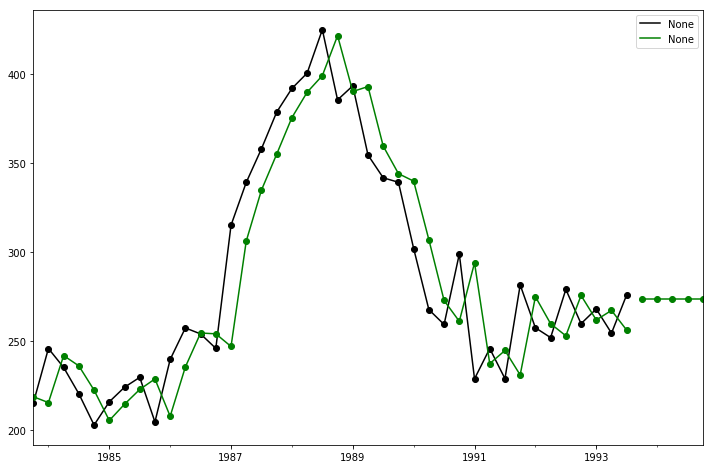

In [198]:
ax = finalData.plot(marker='o', color='black', figsize=(12,8), legend=True)
fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')

In [136]:
ax=oildata.plot()

NameError: name 'ax' is not defined

In [145]:
fit3['slope']

TypeError: 'HoltWintersResultsWrapper' object is not subscriptable

In [199]:
fit3.model.params

{'smoothing_level': 0.8692234220364141,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 218.92834361531058,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [234]:
data = df.Seasonally.values.tolist()
index= pd.date_range(start='1983-12-01', end='1993-9-01', freq='QS-DEC')
oildata = pd.Series(data, index)

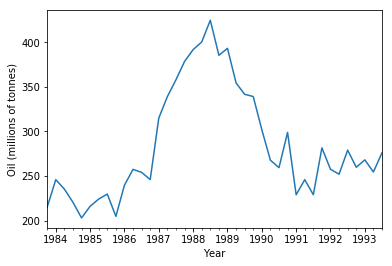

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


In [235]:
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
plt.show()
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

C:\DATA\Tools\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\DATA\Tools\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  end = self.model._index[-1] + steps
C:\DATA\Tools\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


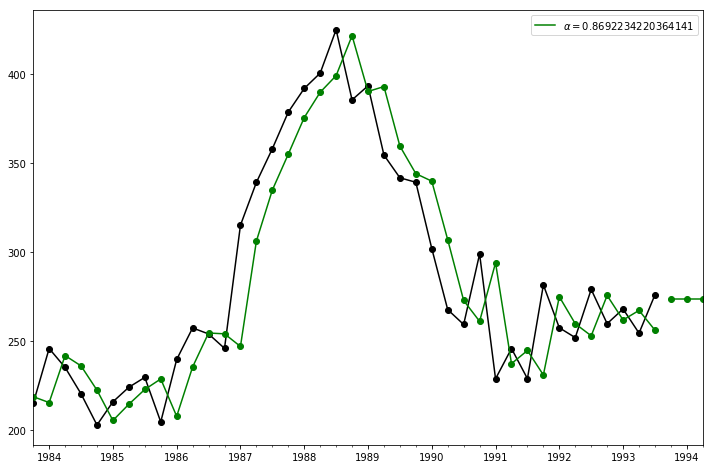

In [237]:
fit3 = SimpleExpSmoothing(oildata).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

ax = oildata.plot(marker='o', color='black', figsize=(12,8))

fcast3.plot(marker='o', ax=ax, color='green', legend=True)
fit3.fittedvalues.plot(marker='o', ax=ax, color='green')
plt.show()

In [236]:
from pulp import *

In [216]:
prob = LpProblem("Example_Problem", LpMinimize)

In [218]:
var_alpha = LpVariable(name='alpha', lowBound=0, upBound=1, cat='Continous')

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

In [2]:
df = pd.read_excel('Seasonality.xlsx')
# drops the extra title row
df.drop(df.index[0], axis=0, inplace=True)
# resets the index to start at 0. Could probably just make the datetime the index if you wanted.
df.reset_index(inplace=True, drop=True)

In [3]:
# supply an initial value to alpha
alpha = 0.3
array_of_actual_values = df.Seasonally.values

In [4]:
def forecasted(alpha, init_data):
    # values predicted using the single-equation recursive form of Brown’s model
    y = np.empty(len(init_data), float)
    # error values (actual - predicted)
    z = np.empty(len(init_data), float)
    
    for i in range(0, len(init_data)):
        # sets the first two values in predicted to be the first value in actual
        if i < 2:
            y[i] = init_data[0]
        else:
            y[i] = 2 * init_data[i-1] - init_data[i-2] - 2 * (1-alpha) * z[i-1] + ((1-alpha)**2) * z[i-2]
            
        z[i] = init_data[i] - y[i]
        
    return np.sqrt(np.mean(np.square(z)))

In [6]:
result = minimize(forecasted, alpha, array_of_actual_values, bounds=[(0,1)])

In [7]:
# there's a tiny amount of variation in the optimal value based on the initial value for alpha
[alpha_opt] = result.x
print(alpha_opt)

0.47115429855026236
